### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Explore and clean data set


Read in the `coupons.csv` file.





In [142]:
data = pd.read_csv('data/coupons.csv')
pd.set_option('display.max_columns', 30)

In [143]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

## 1.1 Investigate the dataset for missing or problematic data.

In [145]:
data.isnull().sum() # count missing values

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

We can see that we have `car` columnt were most of the values are missing. Based on the task context we can suppose that people are driving when they rececived the coupone. Most probably I'm going to drop this column from data set howevere before the deletion I want to check column values firts.

In [146]:
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

Looks like this column doesn't contain any useful information and we can drop it off.

In [147]:
data.drop(columns=['car'], inplace = True)

Following columns have <1% of missiong values and I'll fill them with the most common value. Columns are: `[Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50]`


In [148]:
data = data.fillna({
    'Bar': data['Bar'].mode()[0], 
    'CoffeeHouse': data['CoffeeHouse'].mode()[0], 
    'CarryAway': data['CarryAway'].mode()[0], 
    'RestaurantLessThan20': data['RestaurantLessThan20'].mode()[0], 
    'Restaurant20To50': data['Restaurant20To50'].mode()[0]
    })

data.isnull().sum()


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

Another column to that I want to fix is 'Age'. We can see that it has an object type. However at the head sample we have a numerical data there. Let's see what values do we have there.

In [149]:
data.age.value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

As we can see, we have 2 string values ['50plus', 'below21']. Let's replace this values with their numerical substitusions

In [150]:
# Replace all instances of "50plus" with "50" in column: 'age'
data['age'] = data['age'].str.replace("50plus", "50", case=False, regex=False)
# Replace all instances of "below21" with "20" in column: 'age'
data['age'] = data['age'].str.replace("below21", "20", case=False, regex=False)
# Change column type to int64 for column: 'age'
data = data.astype({'age': 'int64'})

Another data transformation that I want to make it to convert ['toCoupon_GEQ5min','toCoupon_GEQ15min', 'toCoupon_GEQ25min'] to a single 'Coupon_GEQ' column with numerical values like 5, 15, 25 accordinly. 

In [151]:
data['coupon_GEQ'] = data['toCoupon_GEQ5min'].map(lambda x: 5 if x == 1 else 0) + \
                     data['toCoupon_GEQ15min'].map(lambda x: 10 if x == 1 else 0) + \
                     data['toCoupon_GEQ25min'].map(lambda x: 10 if x == 1 else 0)

data.drop(columns=['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'], inplace=True)
data.coupon_GEQ.value_counts()

coupon_GEQ
15    5611
5     5562
25    1511
Name: count, dtype: int64

Let's apply the same trick for ['direction_same', 'direction_opp'] column.

In [152]:
data['direction'] = data['direction_same'].map(lambda x: 1 if x == 1 else 0) + \
                     data['direction_opp'].map(lambda x: -1 if x == 1 else 0)

data.drop(columns=['direction_same', 'direction_opp'], inplace=True)
data.direction.value_counts()

direction
-1    9960
 1    2724
Name: count, dtype: int64

The last transformation is to make 'expiration' column numerical. To achive that I'll convert all values to hours.

In [153]:
data['expiration'] = data['expiration'].map(lambda x: 24 if x == '1d' else 2 if x == '2h' else x)
data['expiration'] = data['expiration'].astype(int)
data.expiration.value_counts()

expiration
24    7091
2     5593
Name: count, dtype: int64

Now our data set in clean and we can start to explore our data.

## 1.2 Exlopre dataset

How many people accept the coupon? 

In [154]:
accepted = data.query("Y==1")
people_count_who_accept_coupon = accepted.shape[0]
per_of_people_with_coupon = round(people_count_who_accept_coupon/data.shape[0]*100, 1)
print(f'Total people accepted the coupon: {people_count_who_accept_coupon} ({per_of_people_with_coupon}%)')

Total people accepted the coupon: 7210 (56.8%)


Let's see what kind of coupons do we have and what are the most accepted one.

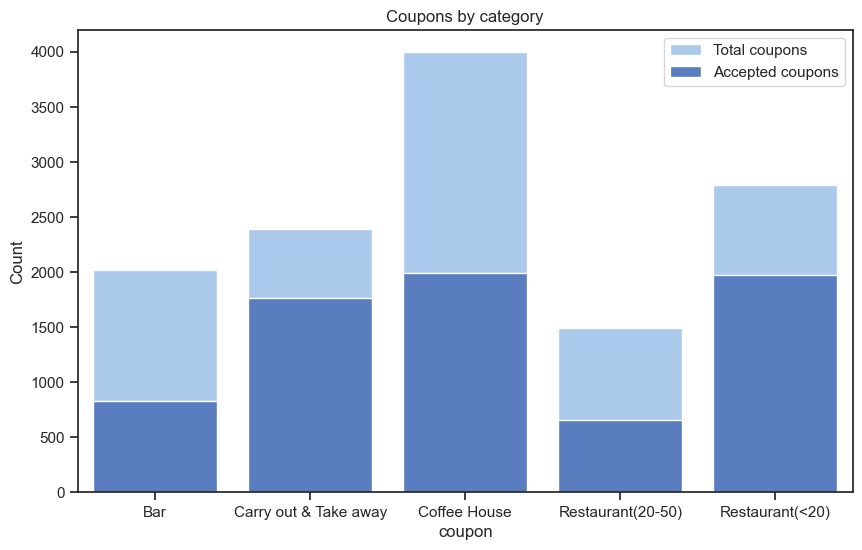

In [155]:
f, ax = plt.subplots(figsize=(10, 6))
sns.set_color_codes('pastel')
sns.countplot(data=data, x='coupon', color='b', label='Total coupons', order=sorted(data['coupon'].unique()))
sns.set_color_codes('muted')
sns.barplot(data=accepted, y='Y', x='coupon', color='b', estimator='sum', label='Accepted coupons', order=sorted(data['coupon'].unique()))
ax.legend()
ax.set_title('Coupons by category')
ax.set_ylabel('Count')
plt.show()


On the plot above we can see `Carry out & Take away` has the hiest acceptance rate.

Use a histogram to visualize the temperature column.

/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


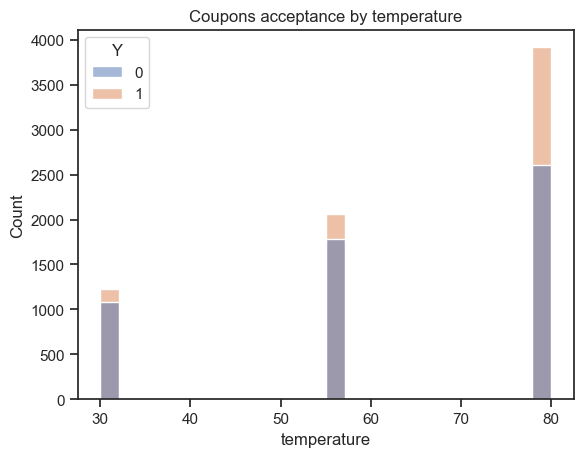

In [156]:
ax = sns.histplot(data=data, x='temperature', hue='Y')
ax.set_title('Coupons acceptance by temperature')
plt.show()

In that picure we can see that we have only 3 distinct values in `temperature` column. Looks like during the hot weather there is higher acceptance rate. Let's calculate the acceptance rate for each temperature value.

In [157]:
data.groupby(['temperature'])[['Y']].mean()

,Y
temperature,
30,0.531088
55,0.536719
80,0.600337


As we can see at 80 degrees we have a 60% acceptance rate compare to 53.1%, 53.7% at colder weather.

## 2. Investigating the Bar Coupons (guided investigation)

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [158]:
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons.shape

(2017, 22)

2. What proportion of bar coupons were accepted?


In [159]:
ar = round(bar_coupons.Y.mean()*100, 2)
print(f'Acceptance rate for "Bar" coupons: {ar}%')

Acceptance rate for "Bar" coupons: 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


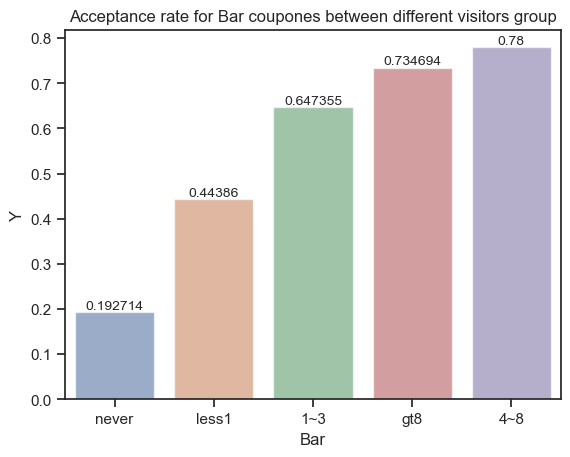

In [160]:
ax = sns.barplot(bar_coupons, x='Bar', y='Y', errorbar=None, alpha=.6)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_title("Acceptance rate for Bar coupones between different visitors group")
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


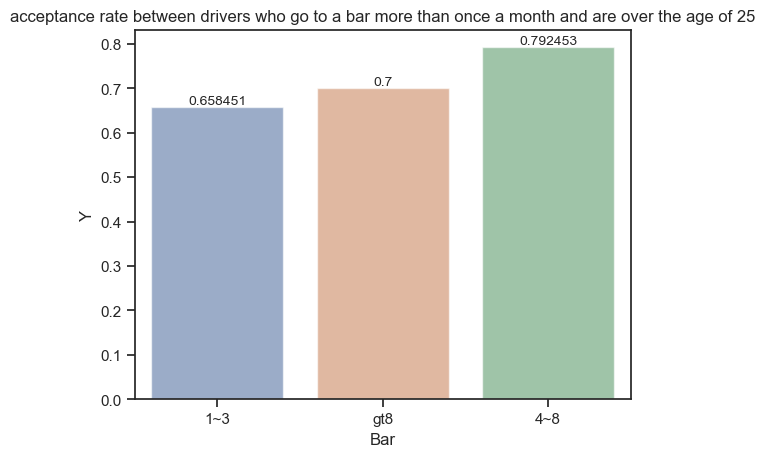

In [161]:
bar_coupons_25_and_older = bar_coupons.query('age > 25 and Bar in ("1~3", "4~8", "gt8")')
ax = sns.barplot(bar_coupons_25_and_older, x='Bar', y='Y', errorbar=None, alpha=.6)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title("acceptance rate between drivers who go to a bar more than once a month and are over the age of 25")
plt.show()

In [162]:
query = (bar_coupons.age>25) & (bar_coupons.Bar.isin(["1~3", "4~8", "gt8"]))
bar_selected_group = round(bar_coupons[query].Y.mean(), 2)
others = round(bar_coupons[~query].Y.mean(), 2)
print(f'{bar_selected_group} - Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25')
print(f'{others} - Acceptance rate for others')

0.7 - Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25
0.34 - Acceptance rate for others


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [163]:
query = (bar_coupons.passanger != 'Kid(s)') & (bar_coupons.Bar.isin(["1~3", "4~8", "gt8"]) & (bar_coupons.occupation != 'Farming Fishing & Forestry'))
bar_selected_group = round(bar_coupons[query].Y.mean(), 2)
others = round(bar_coupons[~query].Y.mean(), 2)
print(f'{bar_selected_group} - Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry')
print(f'{others} - Acceptance rate for others')

0.71 - Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
0.3 - Acceptance rate for others


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



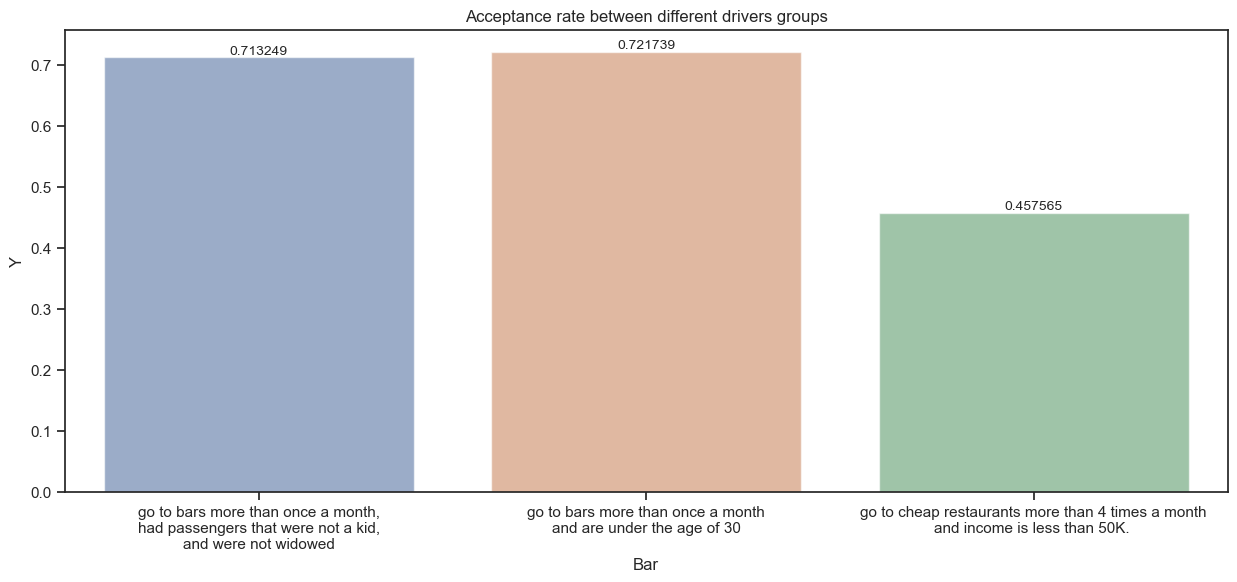

In [164]:
bar_vistitors_g1_ar = bar_coupons.query('passanger != "Kid(s)" and Bar in ("1~3", "4~8", "gt8") and maritalStatus != "Widowed"')['Y'].mean();
bar_vistitors_g2_ar = bar_coupons.query('Bar in ("1~3", "4~8", "gt8") and age < 30')['Y'].mean();
bar_vistitors_g3_ar = bar_coupons.query('RestaurantLessThan20 in ("4~8", "gt8") and income in ("$12500 - $24999", "$25000 - $37499","$37500 - $49999")')['Y'].mean();
bar_vistitors_6 = pd.DataFrame({
    'Bar': ['go to bars more than once a month,\nhad passengers that were not a kid,\nand were not widowed', 
            'go to bars more than once a month\nand are under the age of 30', 
            'go to cheap restaurants more than 4 times a month\nand income is less than 50K. '],
    'Y': [bar_vistitors_g1_ar, bar_vistitors_g2_ar, bar_vistitors_g3_ar]
})
plt.figure(figsize=(15, 6))
ax = sns.barplot(bar_vistitors_6, x='Bar', y='Y', errorbar=None, alpha=.6)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title("Acceptance rate between different drivers groups")
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the reviewed selections the hiest acceptance rate is in a group of people who go to the bars 4-8 times per month. Another group with a high acceptance are drivers who go to the bars more then 8 times per week.

Other selection criterieas doesn't impact acceptance rate that much. 

My futher recomendations for Bar coupon investigation woulbe be to build scatter plots between attributes like weather, income, destination, time of the day and geolocation. Considering this attributes I anticipate that we may find a group of people with even higher acceptance rate.

# 3. Coffee House coupons (Independent Investigation)

I chouse the Coffee House coupons as because of a low acceptance rate. My goal to find the most impactful criteria for the acceptance rate and build a recomndation when and whom we should offer this coupons.

Let's get started.

First, let's see what is the current acceptance rate for our category.

In [188]:
coffee_coupons = data[data.coupon == 'Coffee House']
ar = round(coffee_coupons.Y.mean()*100, 2)
print(f'Total "Coffee House" coupons: {coffee_coupons.shape[0]}')
print(f'Acceptance rate for "Coffee House" coupons: {ar}%')

Total "Coffee House" coupons: 3996
Acceptance rate for "Coffee House" coupons: 49.92%


Let's draw pairplot for our coffee coupons and see if there any correlation based on acceptance column

/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

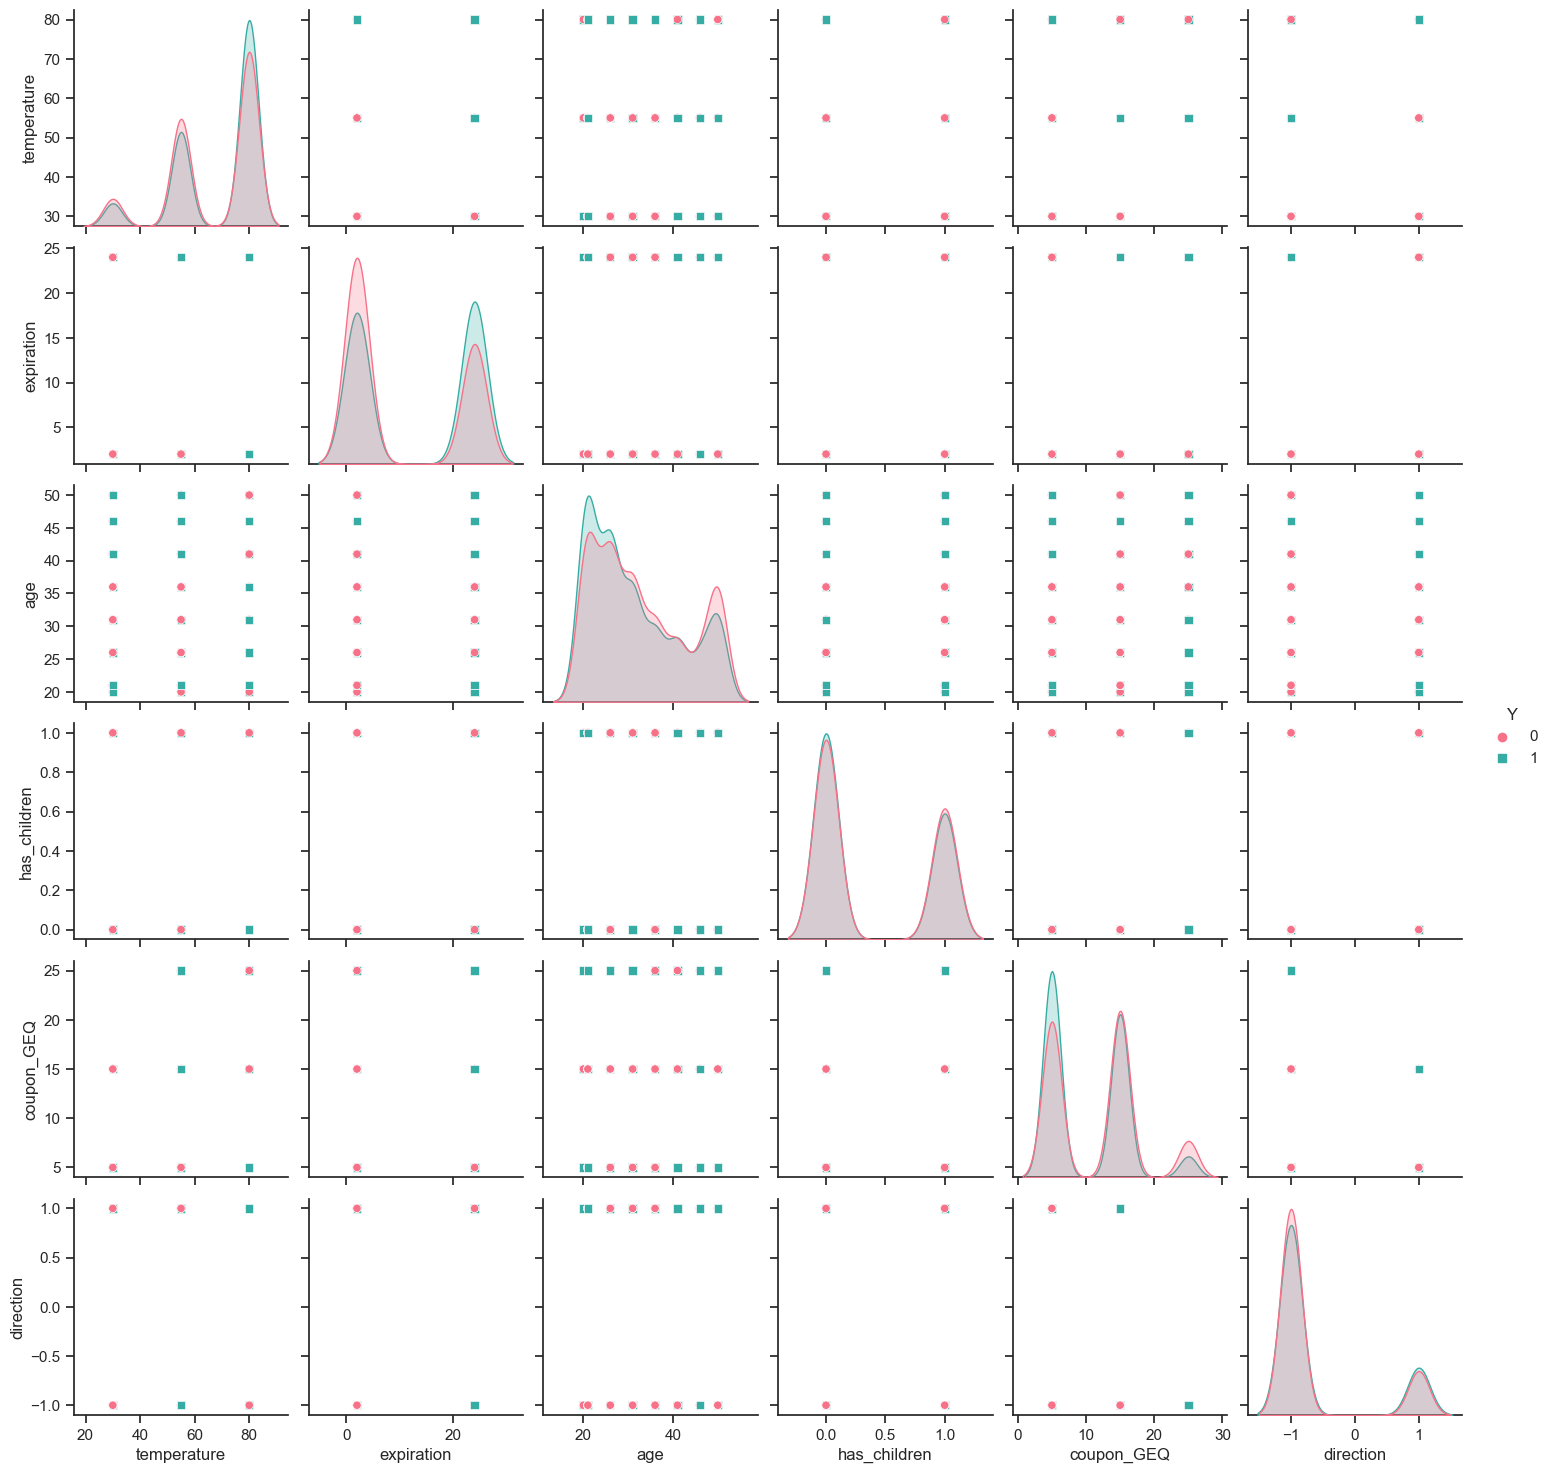

In [166]:
sns.pairplot(coffee_coupons, hue="Y", palette="husl", markers=["o", "s"], diag_kind="kde")

plt.show()

Based on the pairplot above we can see higher acceptance rage in the following groups:
- high temperature
- longer experation time
- yanger audience
- closer geolocation

Acceptance rate for different groups in ['has_children', 'direction'] is very close to 50%

Let's calculate numerical values for this groups.

In [272]:
print('Acceptance rate for "Coffee House" coupons by different features:')
print(f'- "temperature == 80" = {coffee_coupons.query("temperature == 80").Y.mean()}')
print(f'- "expiration == 24"  = {coffee_coupons.query("expiration == 24").Y.mean()}')
print(f'- "coupon_GEQ == 5"   = {coffee_coupons.query("coupon_GEQ == 5").Y.mean()}')
print(f'- "age < 30"          = {coffee_coupons.query("age < 30").Y.mean()}')

Acceptance rate for "Coffee House" coupons by different features:
- "temperature == 80" = 0.5297792586422324
- "expiration == 24"  = 0.5839457320520068
- "coupon_GEQ == 5"   = 0.5481019240769631
- "age < 30"          = 0.5342902711323764


The most interesting category for us is "Expiration == 1d". 

Let's review our categorical columns.

In [167]:
data.select_dtypes(include='object').columns


Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'gender',
       'maritalStatus', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')

We have a set of categorical columns. Some of them looks more promissing then others. However let's visualize acceptance rate for each category to narrow our focus group.

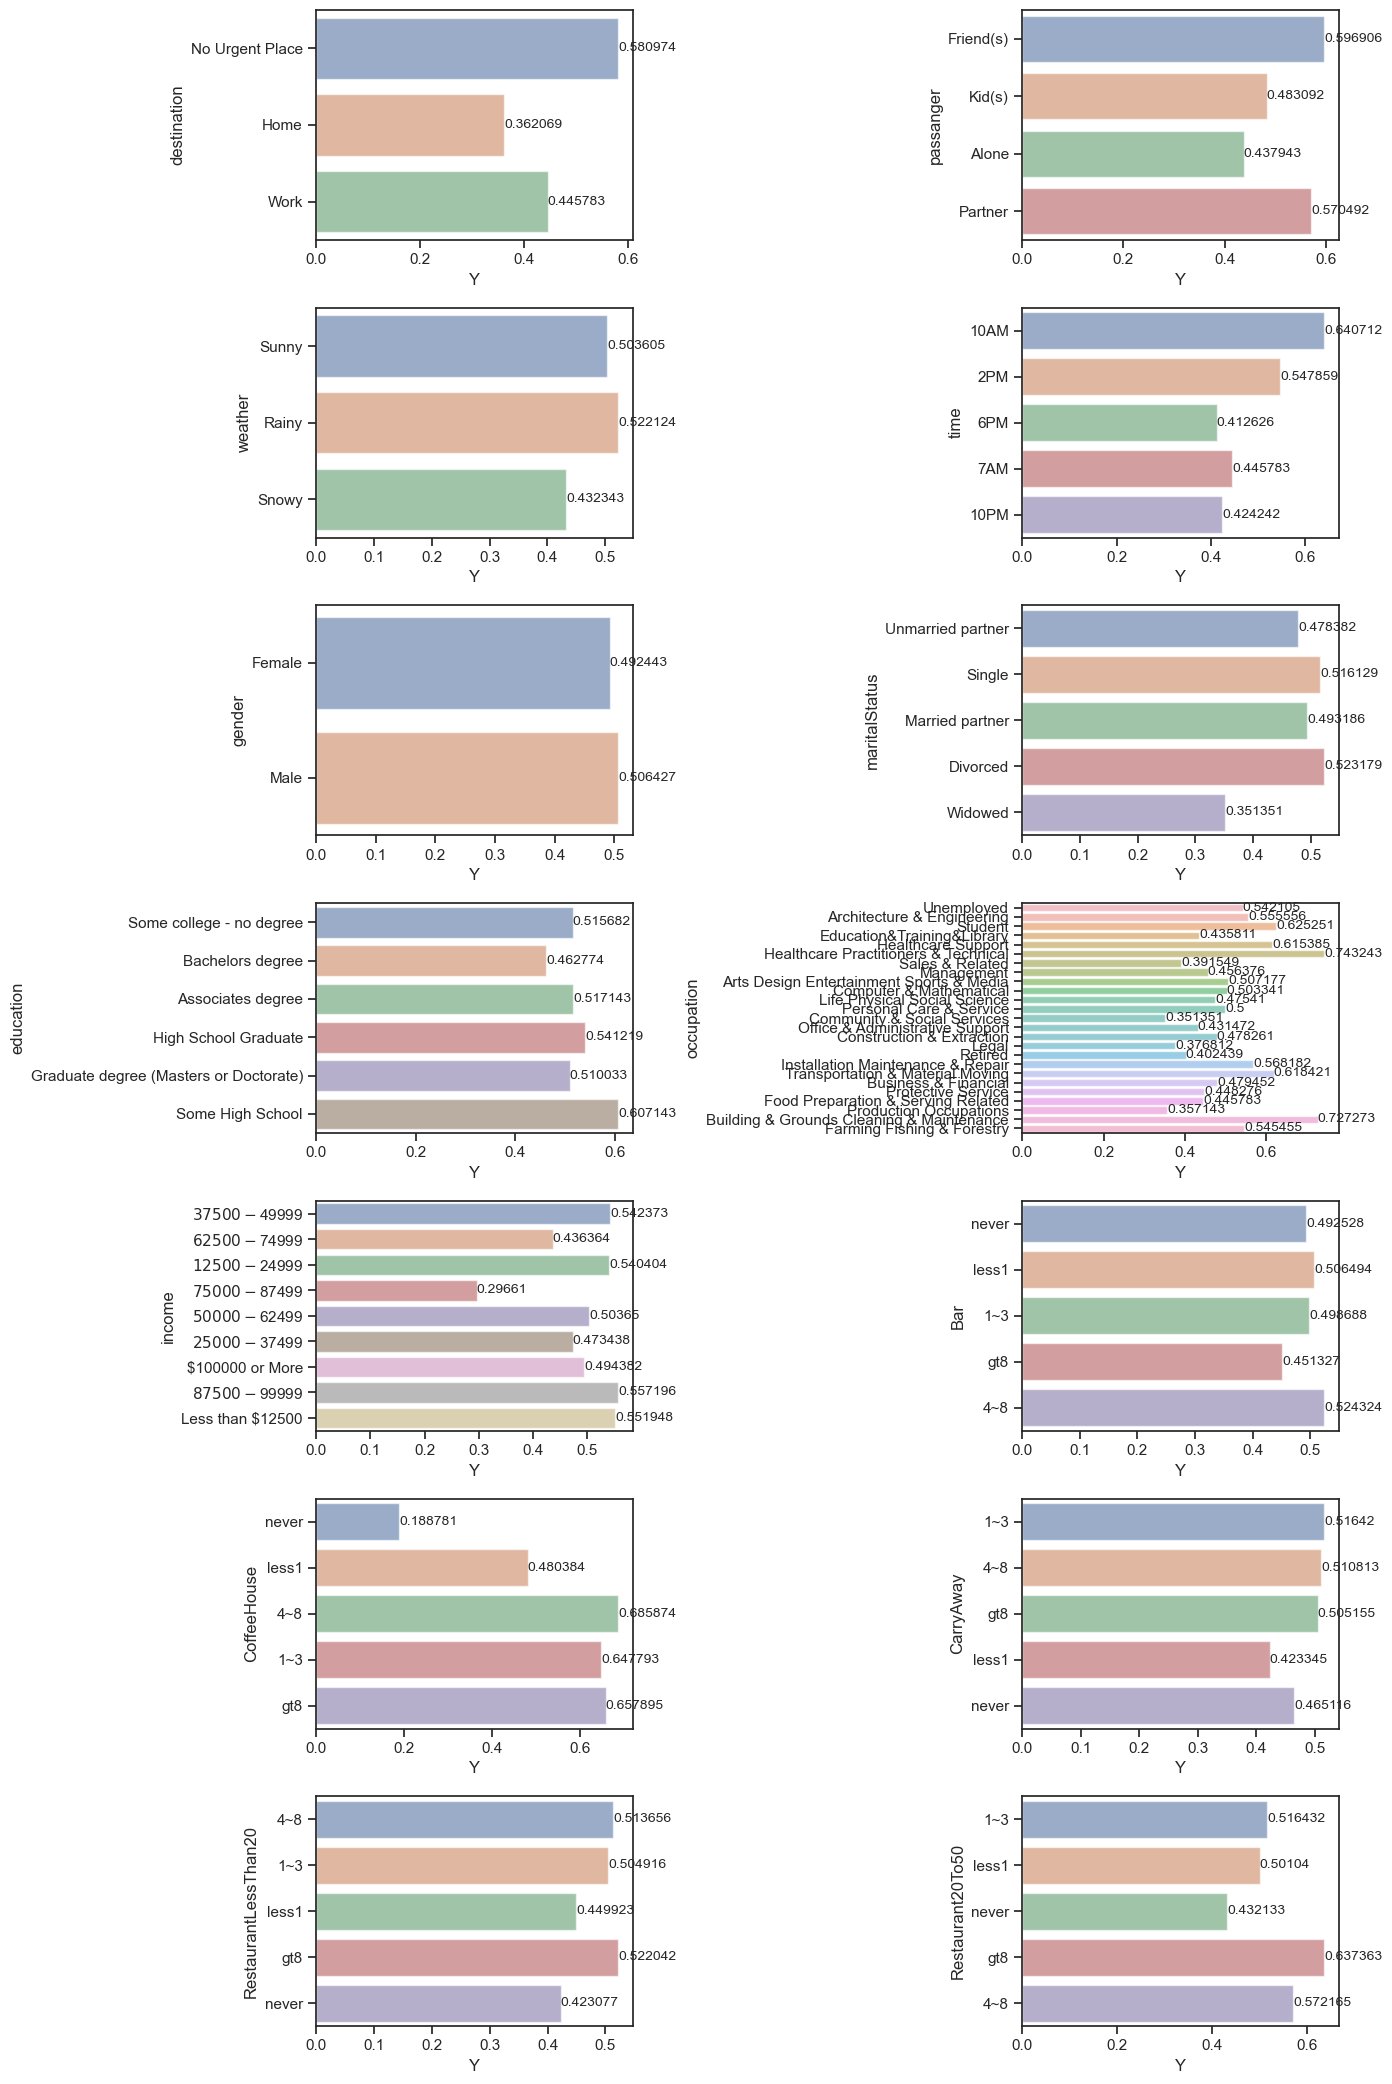

In [210]:
cats = ['destination', 'passanger', 'weather', 'time', 'gender',
       'maritalStatus', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

fig, axes = plt.subplots(len(cats)//2, 2, figsize=(14, 3 * (len(cats)//2)))

for i, cat in enumerate(cats):
    ax = sns.barplot(data=coffee_coupons, y=cat, x='Y', alpha=.6, errorbar=None, ax=axes[i//2, i%2])
    ax.bar_label(ax.containers[0], fontsize=10)

plt.tight_layout()
plt.show()


Let's review where we have a hier acceptance rate:
- People who is driving to Non-urgant place
- People who is driving with Friend or Partner
- At the first part of the day (10am-2pm)
- not Widowed
- who is visiting coffee house more than once per month

Other interesting facts:
- we have a big difference in a occupation distribution that worth to explore separatly
- people with an income 75000-87499 has a low acceptance rate. Since this group somewhere in the middle of income distribution this number looks suspitious.


### Occupation

As a next step I want to explore futher occupation acceptance rate.

/Users/Tsimafei_Dynikau/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


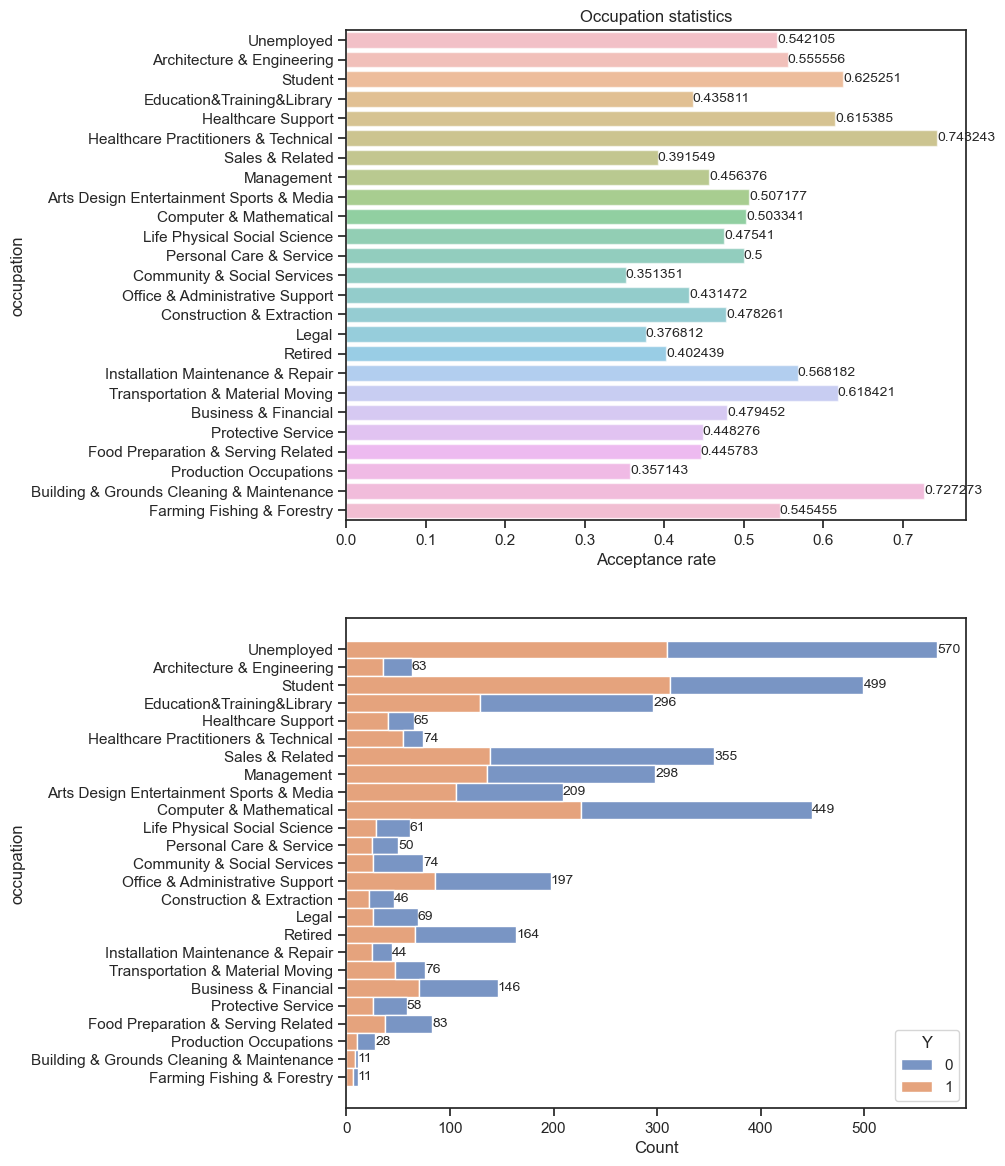

In [245]:
f, ax = plt.subplots(2, 1, figsize=(8, 14))
sns.barplot(data=coffee_coupons, y='occupation', x='Y', alpha=.6, errorbar=None, ax=ax[0])
sns.histplot(data=coffee_coupons, y='occupation', hue="Y", multiple="stack", ax=ax[1])
ax[0].bar_label(ax[0].containers[0], fontsize=10)
ax[0].xaxis.set_label_text('Acceptance rate')
ax[1].bar_label(ax[1].containers[1], fontsize=10)
ax[0].set_title('Occupation statistics')
plt.show()

As a next step I'm going tofilter out all occupation with acceptance rate >= 60%.

In [254]:
occupation_mean = coffee_coupons.groupby('occupation', as_index=False)['Y'].mean()
occupations_with_ar_60 = occupation_mean[occupation_mean['Y'] >= 0.6].occupation.values
occupations_with_ar_60


array(['Building & Grounds Cleaning & Maintenance',
       'Healthcare Practitioners & Technical', 'Healthcare Support',
       'Student', 'Transportation & Material Moving'], dtype=object)

## Coffee House User profile

Let's start with the most promission categories 
- Visit coffee houser more then 1 time per month
- coupone time is between 10am and 2PM

In [281]:
coffee_coupons_focus_group = coffee_coupons.query('CoffeeHouse in ("1~3", "4~8", "gt8") and time in ("10AM", "2PM")')
print(f'Focus group count: {coffee_coupons_focus_group.shape[0]}')
print(f'Acceptance rate for focus group: {round(coffee_coupons_focus_group.Y.mean()*100, 2)}%')

Focus group count: 811
Acceptance rate for focus group: 77.44%


If we want to narrow down the focus group we can apply our knowledge about occupation and see what are the acceptance chanses in this case.

In [282]:
occupation_sub_group = coffee_coupons_focus_group.query('occupation in @occupations_with_ar_60')
print(f'Occupation sub-group count: {occupation_sub_group.shape[0]}')
print(f'Acceptance ratep: {round(occupation_sub_group.Y.mean()*100, 2)}%')

Occupation sub-group count: 191
Acceptance ratep: 84.82%


## Coffee House Summary 
Primary users for **Coffee House** coupons is customers who visit coffee houses more than once per month and prefer coupon times between 10am and 2pm.
Average acceptance rate for this group of customer is 77.44%. What is much higher compare to the average AR of 49.92% for Coffee House coupons category.

If we consider cutomer occupation on top AR become 84.82%. Occupations with high AR are following: 
`['Building & Grounds Cleaning & Maintenance', 'Healthcare Practitioners & Technical', 'Healthcare Support', 'Student', 'Transportation & Material Moving']`

Higher acceptance rates are observed for attributes as higher temperatures, longer expiration times, younger audiences, closer geolocations, and
specific categories, such as non-urgent destination, driving with a friend or partner, and coupon time between 10am and 2pm.
However averall impact estimated as moderate for this attributes.

As futher recomendations it would be valueable to gether information about:
- If user accepted the coupon did they use it?
- In case if customer uses the coupone was this transaction proffitable for the company. 

This information will allow us to evaluate what is the target proffitable acceptance rate for the coupons. It will allow us to build a better user proffile, suggest the couponse for the wider audience, bring more trafict and more profite for the bussiness. 

